In [164]:
import collections
import pandas as pd
import tensorflow as tf
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import vae_lib.utils.nn_logger as log
from vae_lib.nn.simple_nn import SimpleNN
from vae_lib.nn.stochastic_nn_with_gmm import StochasticNNWithGmm
from vae_lib.graphics.plot_utils import plot_2d_latent_space
from vae_lib.preprocessing.data_permutation import permute
from vae_lib.utils.static_gmm_on_circle import StaticGmmOnCircle


from vae_lib.preprocessing.load_mnist import load_mnist
from vae_lib.nn.dense_layer import DenseLayer
from vae_lib.utils.dynamic_gmm_on_circle import DynamicGmmOnCircle
from vae_lib.utils.mixture_assignments import create_mixture_assignments
import matplotlib.pyplot as plt
from vae_lib.utils.measures import accuracy_for_score
from vae_lib.utils.measures import classification_ratio
from vae_lib.utils.measures import calculate_accuracy_np

Normal = tf.distributions.Normal
Bernoulli = tf.distributions.Bernoulli

In [2]:
X_train_orig, X_test, y_train_orig, y_test, onehot_encoder = load_mnist()

In [3]:
X_train, y_train = permute(X_train_orig,y_train_orig)

In [4]:
tf.reset_default_graph()
log_folder = log.get_log_folder()
print("Writing logs to: {}".format(log_folder))
simple_nn = SimpleNN([784, 512, 256, 10], learning_rate=1e-3, log_folder=log_folder)
simple_nn.fit(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    epochs=1, 
    log_interval=100
)

Writing logs to: /tmp/class_vae/deep/27_04_2019/20190427160755
Train accuracy: 70.11%
Test accuracy: 70.39%


In [5]:
#tf.reset_default_graph()
log_folder = log.get_log_folder()
print('Starting autoencoder. Log folder={}'.format(log_folder))

K=10
init_cov = np.array([
    [0.07,0.0],
    [0.0,0.007]
], dtype="float64")
betas = np.ones(K)/K


model_supervised = StochasticNNWithGmm(
    x_dim=X_train.shape[1],
    y_dim=y_train.shape[1],
    hidden_dims=[512, 256, 128, 2],
    log_folder=log_folder,
    alpha=0,
    beta=0,#0.1,
    gamma=1,
    omega=0.0001,
    r=0.8,
    K=K,
    init_cov=init_cov,
    mixture_weights=betas
)
model_supervised.fit(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    mixture_assignments=y_train,
    epochs=3,
    log_interval=100
)

test_acc = model_supervised.calculate_accuracy(X=X_test, y=y_test)
print("Test accuracy {}".format(test_acc))

Starting autoencoder. Log folder=/tmp/class_vae/deep/27_04_2019/20190427160806
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp

TypeError: fit() got an unexpected keyword argument 'mixture_assignments'

In [ ]:
plot_2d_latent_space(model_supervised, onehot_encoder, X_train, y_train)

In [ ]:
plot_2d_latent_space(model_supervised, onehot_encoder, X_test, y_test)

In [4]:
label_mapping = {
    0: 0,
    1: 7,
    2: 4,
    3: 8,
    4: 9,
    5: 3,
    6: 5,
    7: 1,
    8: 6,
    9: 2
}

mixture_assignments_train = create_mixture_assignments(
    label_mapping=label_mapping, 
    onehot_encoder=onehot_encoder, 
    y_train=y_train)

mixture_assignments_test = create_mixture_assignments(
    label_mapping=label_mapping, 
    onehot_encoder=onehot_encoder, 
    y_train=y_test)

In [197]:
#tf.reset_default_graph()
log_folder = log.get_log_folder()
print('Starting autoencoder. Log folder={}'.format(log_folder))
K=10
init_cov = np.array([
    [0.07,0.0],
    [0.0,0.007]
], dtype="float64")

betas = np.ones(K)/K



model_supervised_latent_supervised = StochasticNNWithGmm(
    x_dim=X_train.shape[1],
    y_dim=y_train.shape[1],
    hidden_dims=[1024, 512, 256, 128, 2],
    log_folder=log_folder,
    alpha=0,
    beta=0,#0.1,
    gamma=1,
    omega=0.01,
    r=0.8,
    K=K,
    init_cov=init_cov,
    is_latent_supervised=True,
    mixture_weights=betas
)
model_supervised_latent_supervised.fit(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    mixture_assignments_train=mixture_assignments_train,
    mixture_assignments_test=mixture_assignments_test,
    epochs=3,
    log_interval=100
)

test_acc = model_supervised_latent_supervised.calculate_accuracy(X=X_test, y=y_test)
print("Test accuracy {}".format(test_acc))

Starting autoencoder. Log folder=/tmp/class_vae/deep/27_04_2019/20190427180035
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 10]
self.y.shape [None, 10]
xy.shape [None, 794]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 984
epoch: 0
Train accuracy 0.9434603452682495
Test accuracy 0.9382857084274292
epoch: 1
Train accuracy 0.9630634784698486
Test accuracy 0.9494285583496094
epoch: 2
Train accuracy 0.976111114025116
Test accuracy 0.9610000252723694
Test accuracy 0.9612857103347778


In [198]:
pred_123 = model_supervised_latent_supervised.predict(X_test)[0]
calculate_accuracy_np(pred_123, y_test)

0.9618571428571429

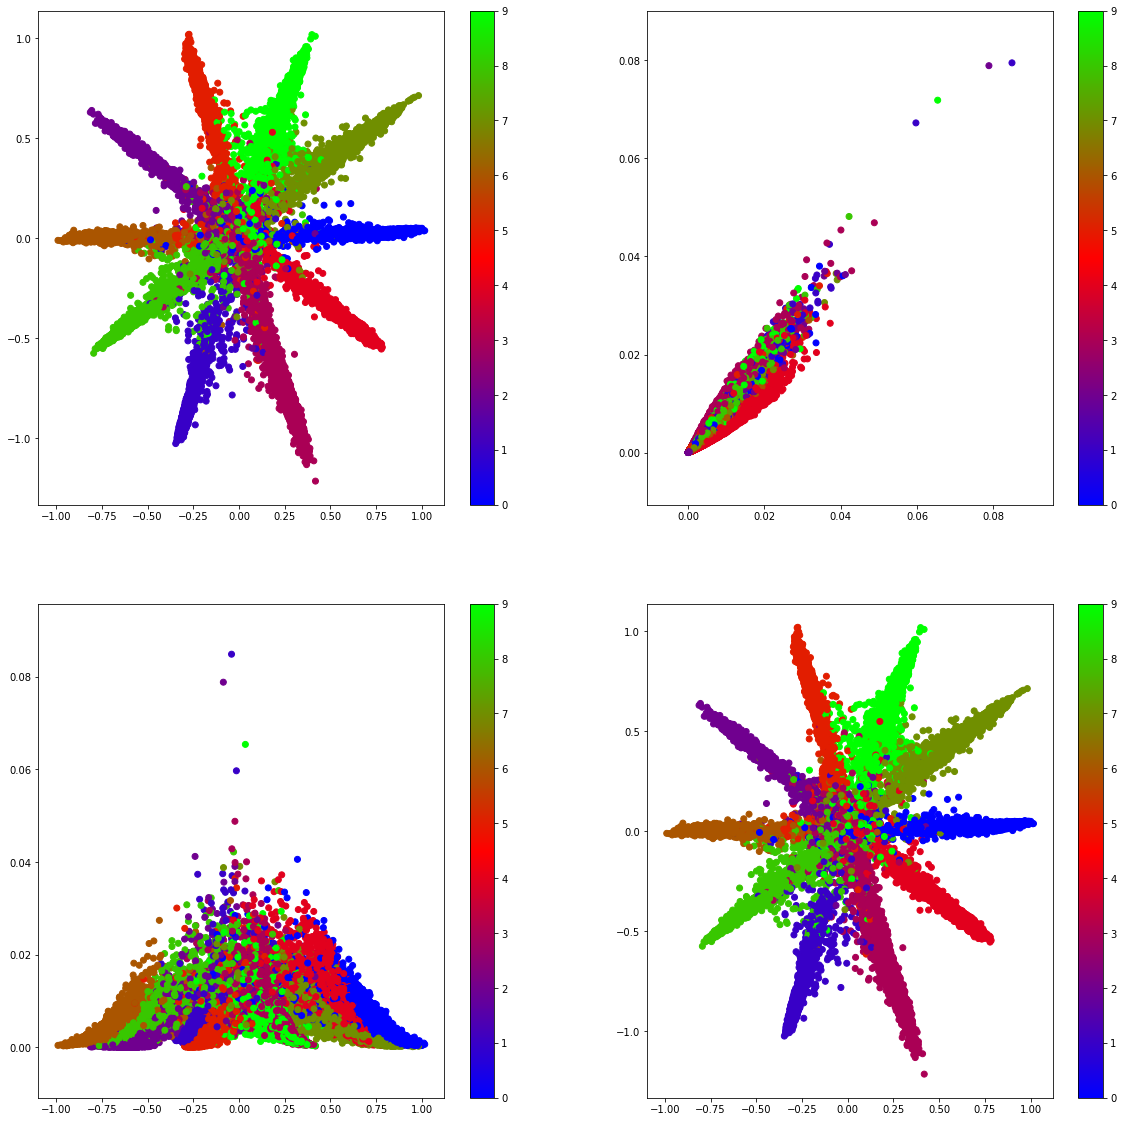

In [199]:
plot_2d_latent_space(model_supervised_latent_supervised, onehot_encoder, X_train, y_train)


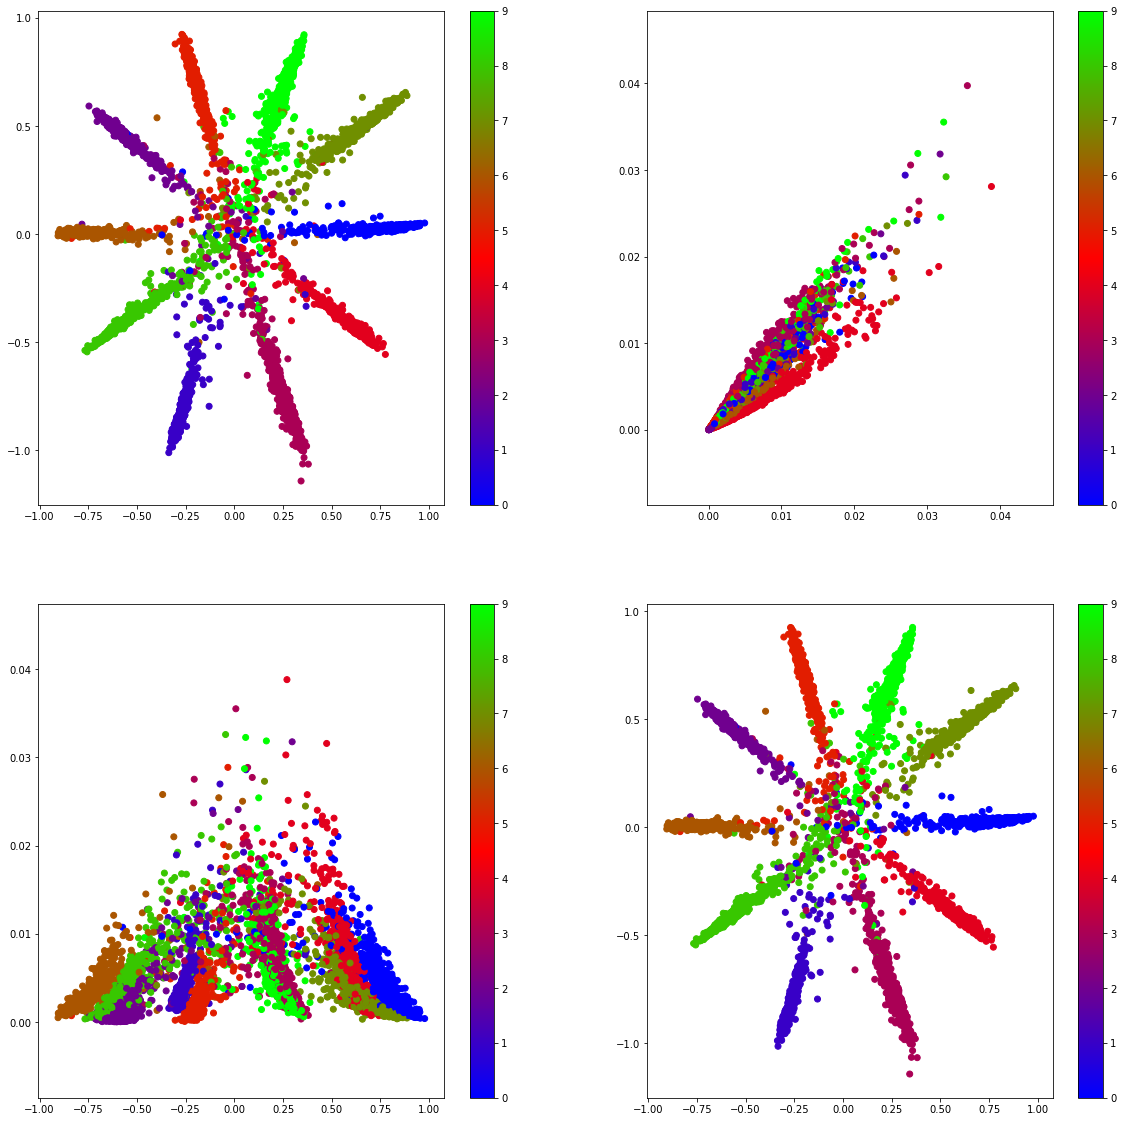

In [200]:
plot_2d_latent_space(model_supervised_latent_supervised, onehot_encoder, X_test, y_test)


In [201]:
def plot_confidence_accuracy(data, response):
    prediction, score_arr = model_supervised_latent_supervised.predict(data)
    max_score = np.max(score_arr)
    thresholds = np.linspace(0,max_score,100)
    accuracy_plot = [accuracy_for_score(prediction, response, score_arr, threshold) for threshold in x_plot]
    class_ratio = [classification_ratio(score_arr, threshold) for threshold in thresholds]
    #score_plot = [classification_ratio(score_arr, s) for s in x_plot]
    
    fig = plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(x_plot, accuracy_plot)
    plt.xlabel("Threshold")
    plt.ylabel("Accuracy")
    
    plt.subplot(1, 3, 2)
    plt.plot(x_plot, class_ratio)
    plt.xlabel("Threshold")
    plt.ylabel("Percentage of cases above threshold")
    
    
    plt.subplot(1, 3, 3)
    plt.plot(accuracy_plot, class_ratio)
    plt.xlabel("Accuracy")
    plt.ylabel("Percentage of cases meeting accuracy")
    plt.show()
    
    return np.array(thresholds), np.array(score_arr), np.array(accuracy_plot), np.array(class_ratio)

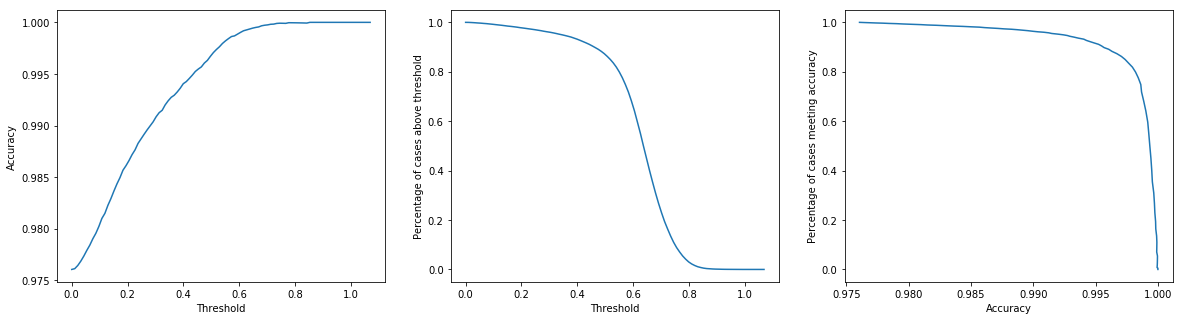

In [202]:
thresholds_train, score_arr_train, accuracy_train, class_ratio_train = plot_confidence_accuracy(X_train, y_train)

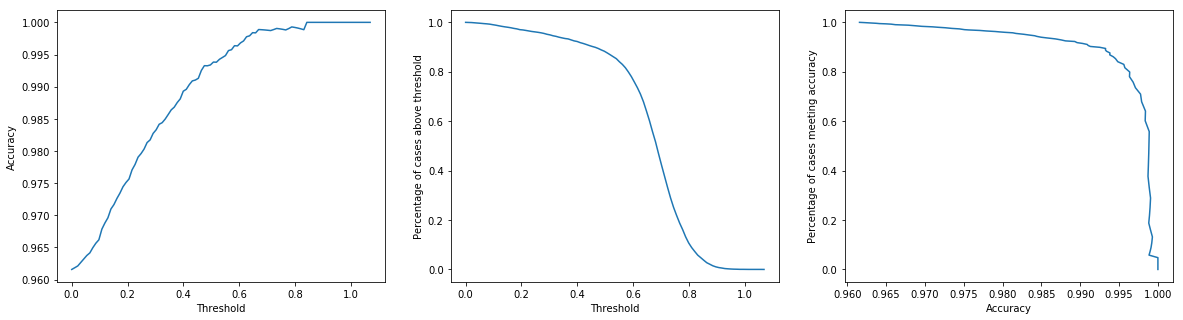

In [203]:
thresholds_test, score_arr_test, accuracy_test, class_ratio_test = plot_confidence_accuracy(X_test, y_test)

In [204]:
score_arr_train

array([0.5359317 , 0.36883584, 0.7701411 , ..., 0.71147877, 0.7170956 ,
       0.8488929 ], dtype=float32)

In [205]:
len(score_arr_test[score_arr_test > cut_off_train])

3431

In [206]:
cut_off_train = np.min(thresholds_train[accuracy_train > 0.999])
# cut_off_test = np.min(thresholds_test[accuracy_test > 0.99])
# cut_off_train

In [207]:
cond_high_score_train = score_arr_train >= cut_off_train
cond_high_score_test = score_arr_test >= cut_off_train
cond_low_score_train = score_arr_train < cut_off_train
cond_low_score_test = score_arr_test < cut_off_train

In [208]:
X_train_low = X_train[cond_low_score_train]
y_train_low = y_train[cond_low_score_train]
X_test_low = X_test[cond_low_score_test]
y_test_low = y_test[cond_low_score_test]
X_train_low.shape, y_train_low.shape, X_test_low.shape, y_test_low.shape

((22552, 784), (22552, 10), (2590, 784), (2590, 10))

In [209]:
X_test_high = X_test[cond_high_score_test]
y_test_high = y_test[cond_high_score_test]
pred_high = model_supervised_latent_supervised.predict(X_test_high)[0]
calculate_accuracy_np(pred_high, y_test_high)

0.9988662131519275

In [210]:
test_acc_low = model_supervised_latent_supervised.calculate_accuracy(X=X_test_low, y=y_test_low)
print("Test accuracy {}".format(test_acc_low))

Test accuracy 0.8945946097373962


In [211]:
mixture_weights = np.sum(y_train_low, axis=0)/len(y_train_low)
mixture_weights

array([0.0744945 , 0.0375133 , 0.13364668, 0.09524654, 0.13808088,
       0.08433842, 0.10713019, 0.07192267, 0.14118482, 0.116442  ])

In [212]:
log_folder = log.get_log_folder()
mixture_weights = np.sum(y_train_low, axis=0)/len(y_train_low)

mixture_assignments_train_low = create_mixture_assignments(
    label_mapping=label_mapping, 
    onehot_encoder=onehot_encoder, 
    y_train=y_train_low)

mixture_assignments_test_low = create_mixture_assignments(
    label_mapping=label_mapping, 
    onehot_encoder=onehot_encoder, 
    y_train=y_test_low)

model_supervised_latent_supervised_low = StochasticNNWithGmm(
    x_dim=X_train_low.shape[1],
    y_dim=y_train_low.shape[1],
    hidden_dims=[1024, 512, 256, 128, 2],
    log_folder=log_folder,
    alpha=0,
    beta=0,#0.1,
    gamma=1,
    omega=0.00001,
    r=0.8,
    K=K,
    init_cov=init_cov,
    is_latent_supervised=True,
    mixture_weights=mixture_weights
)
model_supervised_latent_supervised_low.fit(
    X_train=X_train_low, 
    y_train=y_train_low, 
    X_test=X_test_low,
    y_test=y_test_low,
    mixture_assignments_train=mixture_assignments_train_low,
    mixture_assignments_test=mixture_assignments_test_low,
    epochs=10,
    log_interval=100
)

test_acc = model_supervised_latent_supervised_low.calculate_accuracy(X=X_test_low, y=y_test_low)
print("Test accuracy {}".format(test_acc))

Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 10]
self.y.shape [None, 10]
xy.shape [None, 794]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 352
epoch: 0
Train accuracy 0.8063142895698547
Test accuracy 0.7868725657463074
epoch: 1
Train accuracy 0.8853760361671448
Test accuracy 0.8613899350166321
epoch: 2
Train accuracy 0.8914065361022949
Test accuracy 0.8637065887451172
epoch: 3
Train accuracy 0.9140209555625916
Test accuracy 0.884555995464325
epoch: 4
Train accuracy 0.9393401741981506
Test accuracy 0.9050192832946777
epoch: 5
Train accuracy 0.9435970187187195
Test accuracy 0.9111968874931335
epoch: 6
Train accuracy 0.9474990963935852
Test accuracy 0.9119691252708435
epoch: 7
Train accuracy 0.9549041986465454
Test accuracy 0.9092664122581482
epoch: 8
Train accuracy 0.9529531598091125
Test accuracy 0.9115830063819885
epoch: 9
Train accuracy 0.9442178010940552
Test accuracy 0.908494234085083
Test accuracy 0.908494234085083


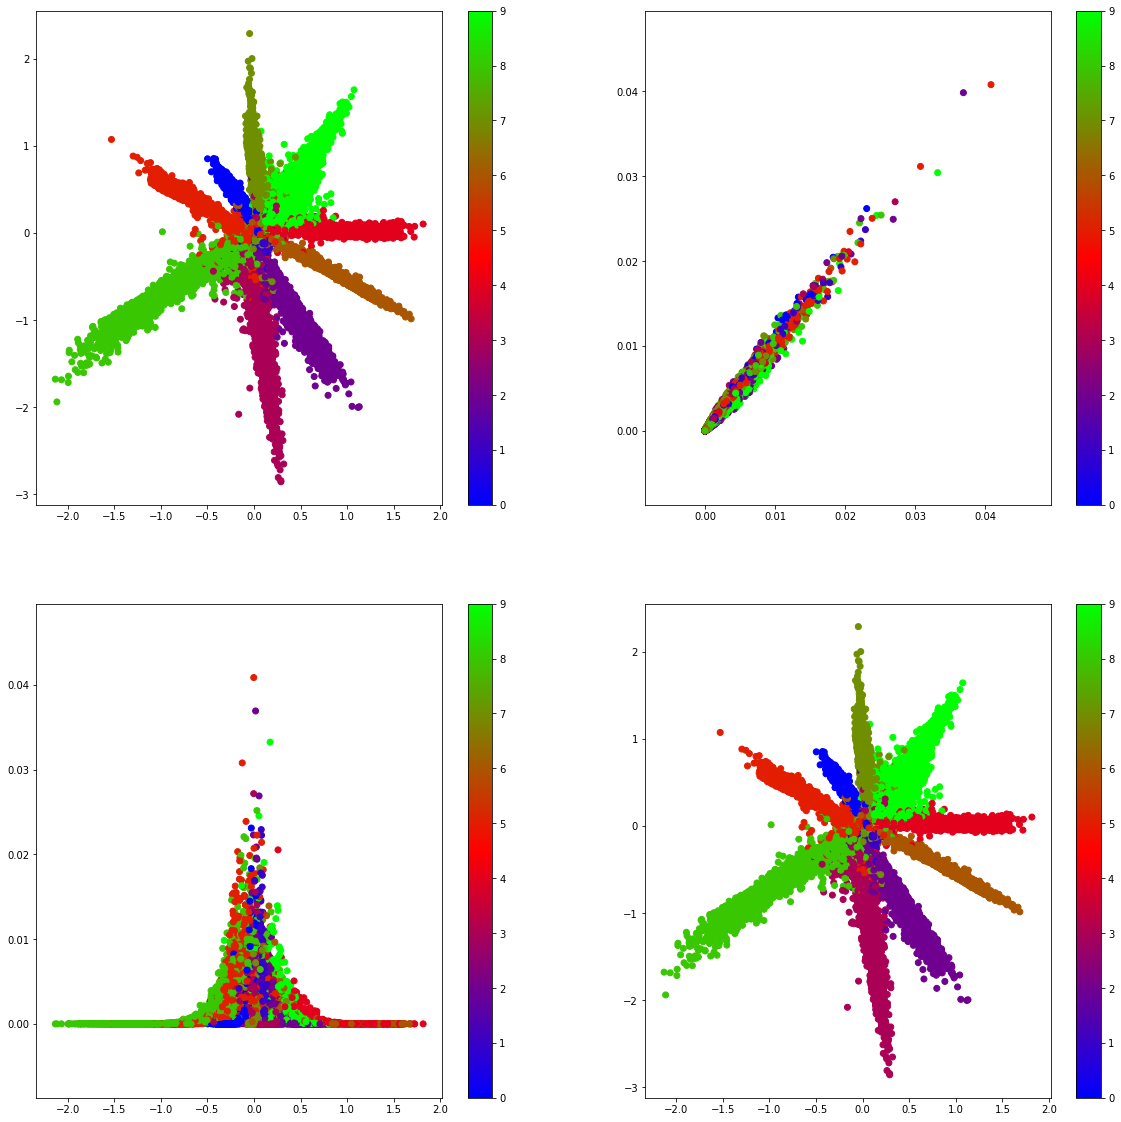

In [213]:
plot_2d_latent_space(model_supervised_latent_supervised_low, onehot_encoder, X_train_low, y_train_low)


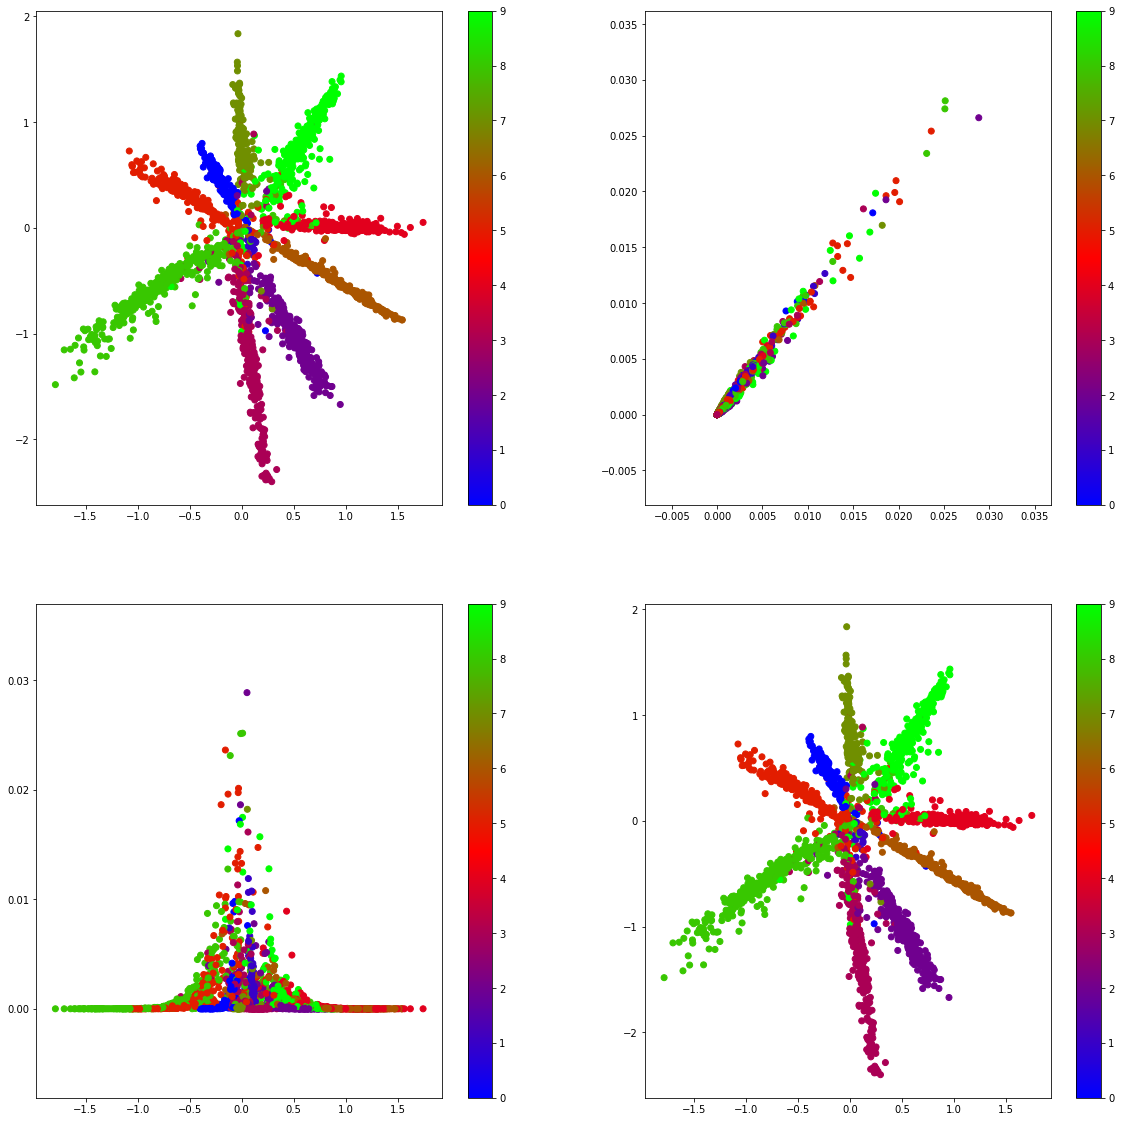

In [214]:
plot_2d_latent_space(model_supervised_latent_supervised_low, onehot_encoder, X_test_low, y_test_low)


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/vae_tests/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


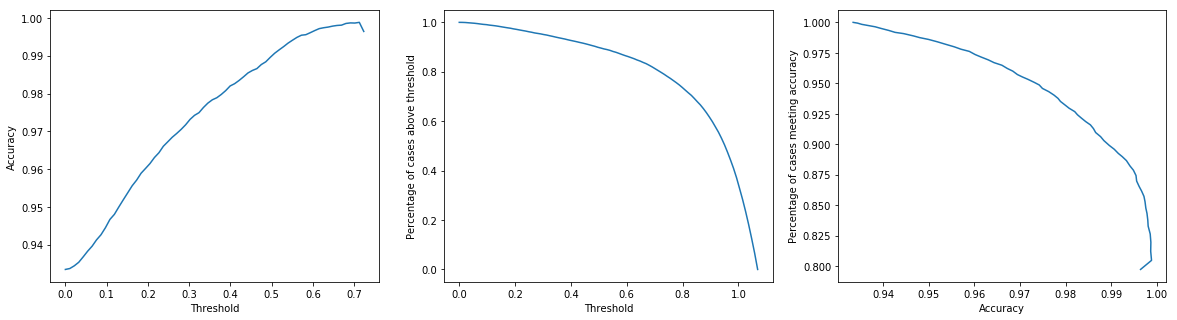

In [215]:
thresholds_train_low, score_arr_train_low, accuracy_train_low, class_ratio_train_low = plot_confidence_accuracy(X_train_low, y_train_low)




In [216]:
pred_low = model_supervised_latent_supervised_low.predict(X_test_low)[0]
calculate_accuracy_np(pred_low, y_test_low)

0.9081081081081082

In [217]:
pred_high.shape, pred_low.shape

((4410, 10), (2590, 10))

In [218]:
pred_all = np.concatenate([pred_high,pred_low], axis=0)
y_test_all = np.concatenate([y_test_high,y_test_low], axis=0)

In [219]:
pred_all.shape

(7000, 10)

In [220]:
calculate_accuracy_np(pred_all, y_test_all)

0.9652857142857143

## Unsupervised

In [15]:
#tf.reset_default_graph()
log_folder = log.get_log_folder()
print('Starting autoencoder. Log folder={}'.format(log_folder))
K=10
init_cov = np.array([
    [0.7,0.0],
    [0.0,0.07]
], dtype="float64")

betas = np.ones(K)/K



model_unsupervised_latent_supervised = StochasticNNWithGmm(
    x_dim=X_train.shape[1],
    y_dim=y_train.shape[1],
    hidden_dims=[512, 256, 128, 2],
    log_folder=log_folder,
    alpha=1,
    beta=0,#0.1,
    gamma=0,
    omega=1,
    r=1.0,
    K=K,
    init_cov=init_cov,
    is_latent_supervised=True,
    mixture_weights=betas
)
model_unsupervised_latent_supervised.fit(
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    mixture_assignments_train=mixture_assignments_train,
    mixture_assignments_test=mixture_assignments_test,
    epochs=1,
    log_interval=100
)

test_acc = model_unsupervised_latent_supervised.calculate_accuracy(X=X_test, y=y_test)
print("Test accuracy {}".format(test_acc))

Starting autoencoder. Log folder=/tmp/class_vae/deep/27_04_2019/20190427150154
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 10]
self.y.shape [None, 10]
xy.shape [None, 794]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 984
epoch: 0
Train accuracy 0.13392063975334167
Test accuracy 0.131571426987648
Test accuracy 0.13128571212291718


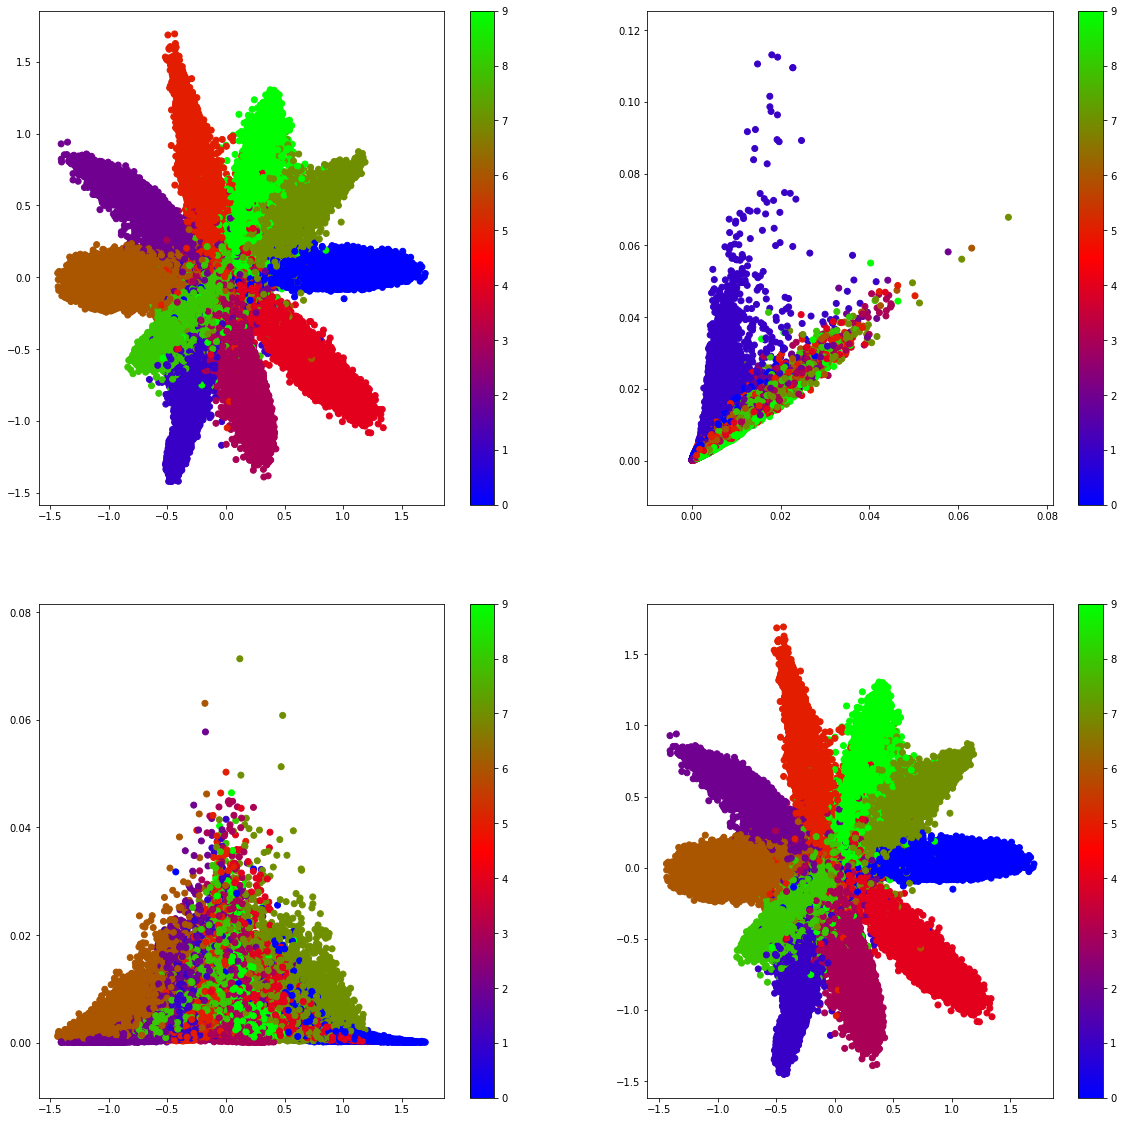

In [16]:
plot_2d_latent_space(model_unsupervised_latent_supervised, onehot_encoder, X_train, y_train)

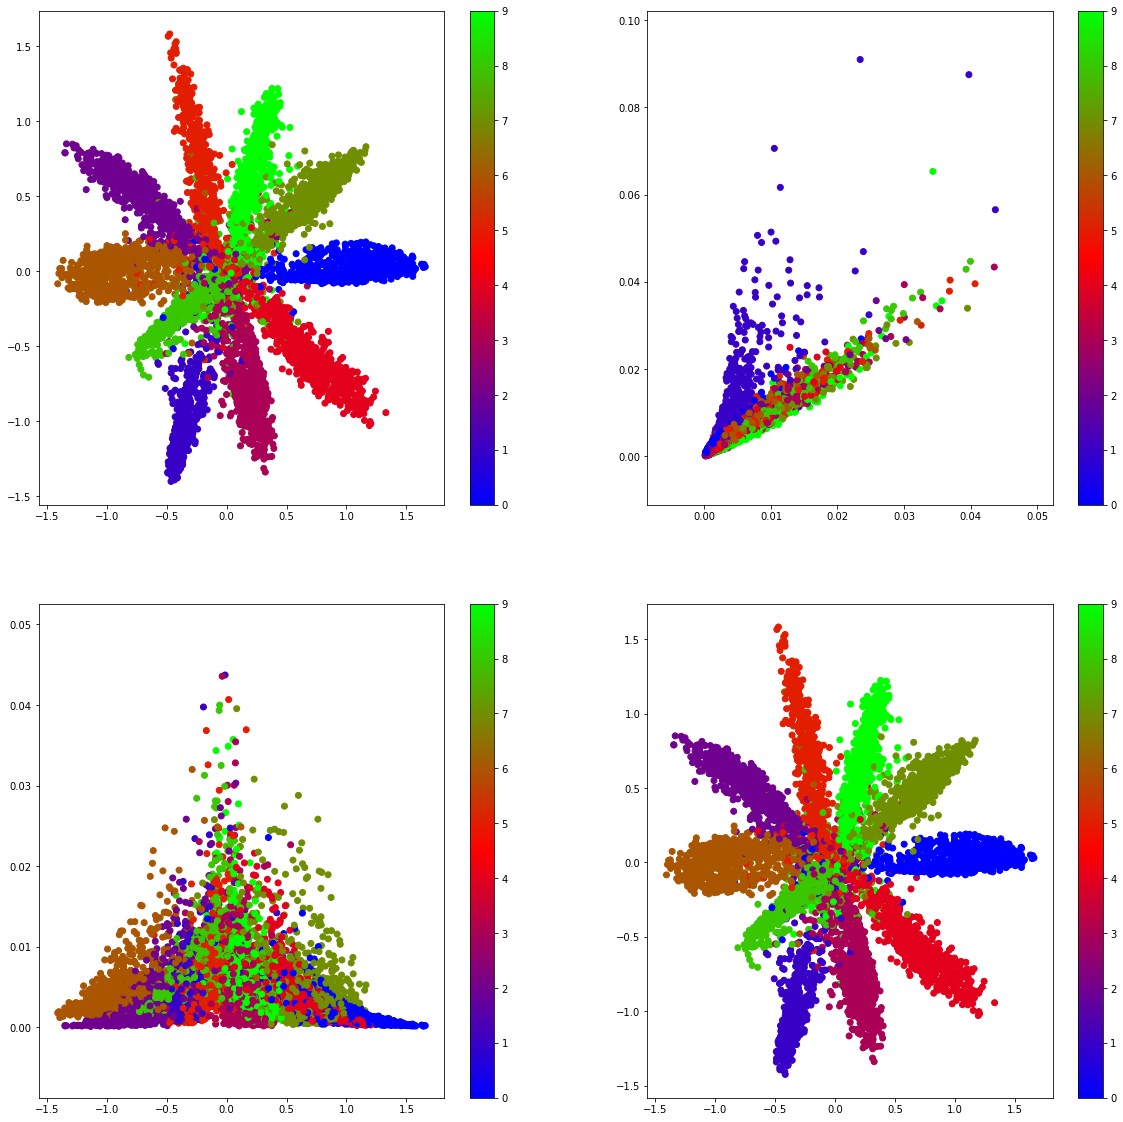

In [17]:
plot_2d_latent_space(model_unsupervised_latent_supervised, onehot_encoder, X_test, y_test)

In [18]:
simulated_single = model_unsupervised_latent_supervised.simulate_from_single_gaussian(0, 1000)

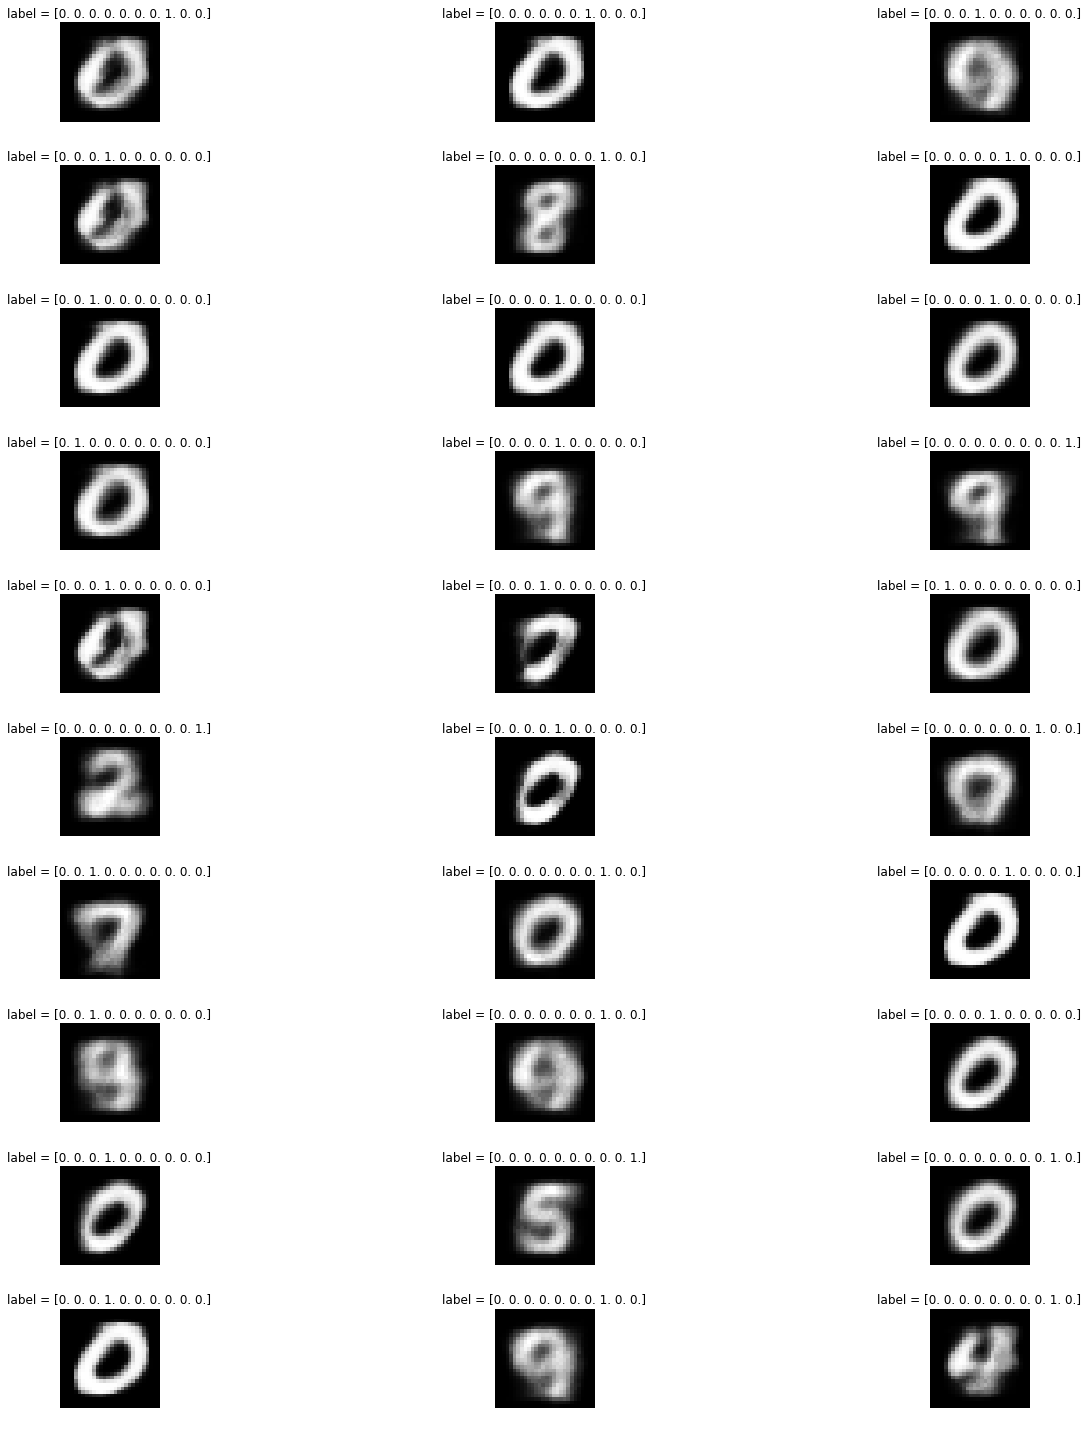

In [19]:
plt.figure(figsize=(20,20))
plot_many_images(simulated_single, y_train, rows=10)

In [12]:
simulated_single = model_unsupervised_latent_supervised.simulate_from_mixture(100)


In [13]:
simulated_single

array([[0.34816778, 0.61950624, 0.45701623, 0.4945368 , 0.47313303,
        0.5045484 , 0.3735262 , 0.3131348 , 0.42939037, 0.4512288 ],
       [0.5159896 , 0.4134594 , 0.39563158, 0.54355925, 0.44308335,
        0.5747055 , 0.4290345 , 0.37450835, 0.46309063, 0.43046948],
       [0.43727887, 0.5776629 , 0.30149457, 0.4415557 , 0.43734056,
        0.40098327, 0.50176185, 0.55446965, 0.40408364, 0.39864305],
       [0.27313748, 0.5654112 , 0.3912875 , 0.553046  , 0.54240453,
        0.44535604, 0.34559956, 0.30072534, 0.45005232, 0.59832025],
       [0.39466146, 0.55411196, 0.29136956, 0.6248795 , 0.6808754 ,
        0.29783612, 0.42468676, 0.38440874, 0.5165479 , 0.5248002 ],
       [0.56648797, 0.45527738, 0.446457  , 0.318056  , 0.5723615 ,
        0.27250478, 0.6690547 , 0.6659744 , 0.3556129 , 0.40737447],
       [0.33984053, 0.62068534, 0.4613897 , 0.49819118, 0.47348207,
        0.50436753, 0.37214327, 0.30505446, 0.42758748, 0.44942078],
       [0.56970763, 0.4203163 , 0.4497773

In [23]:
prediction = model_unsupervised_latent_supervised.predict(X_test)
prediction[0].shape

(7000, 10)

## Supervised with KL as regularization

In [240]:

def train_and_plot(alpha,beta,gamma,omega):
    #tf.reset_default_graph()
    log_folder = log.get_log_folder()
    print('Starting autoencoder. Log folder={}'.format(log_folder))
    K=10
    init_cov = np.array([
        [0.7,0.0],
        [0.0,0.07]
    ], dtype="float64")

    betas = np.ones(K)/K



    model = StochasticNNWithGmm(
        x_dim=X_train.shape[1],
        y_dim=y_train.shape[1],
        hidden_dims=[512, 256, 128, 2],
        log_folder=log_folder,
        alpha=alpha,
        beta=beta,
        gamma=gamma,
        omega=omega,
        r=1.0,
        K=K,
        init_cov=init_cov,
        is_latent_supervised=False,
        mixture_weights=betas
    )
    model.fit(
        X_train=X_train, 
        y_train=y_train, 
        X_test=X_test,
        y_test=y_test,
        mixture_assignments_train=mixture_assignments_train,
        mixture_assignments_test=mixture_assignments_test,
        epochs=2,
        log_interval=100
    )

    test_acc = model.calculate_accuracy(X=X_test, y=y_test)
    print("Test accuracy {}".format(test_acc))
    return model.encode2(X_train)
#     plot_2d_latent_space(model_supervised_with_kl, onehot_encoder, X_train, y_train)


In [244]:
m1, sd1 = train_and_plot(alpha=0, beta=0, gamma=1, omega=0)

Starting autoencoder. Log folder=/tmp/class_vae/deep/27_04_2019/20190427233613
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 10]
self.y.shape [None, 10]
xy.shape [None, 794]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 984
epoch: 0
Train accuracy 0.9448094964027405
Test accuracy 0.9341428279876709
epoch: 1
Train accuracy 0.9648412466049194
Test accuracy 0.9544285535812378
Test accuracy 0.9539999961853027


In [245]:
m2, sd2 = train_and_plot(alpha=0, beta=0.6, gamma=1, omega=0)

Starting autoencoder. Log folder=/tmp/class_vae/deep/27_04_2019/20190427233653
Hidden shape: (?, 2)
self.posterior_predictive_probs_y.shape [None, 10]
self.y.shape [None, 10]
xy.shape [None, 794]


/anaconda3/envs/vae_tests/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


n_batches: 984
epoch: 0
Train accuracy 0.36763492226600647
Test accuracy 0.3678571283817291
epoch: 1
Train accuracy 0.5056508183479309
Test accuracy 0.5027142763137817
Test accuracy 0.5044285655021667


In [248]:
y_decoded = onehot_encoder.inverse_transform(y_train).reshape(-1)

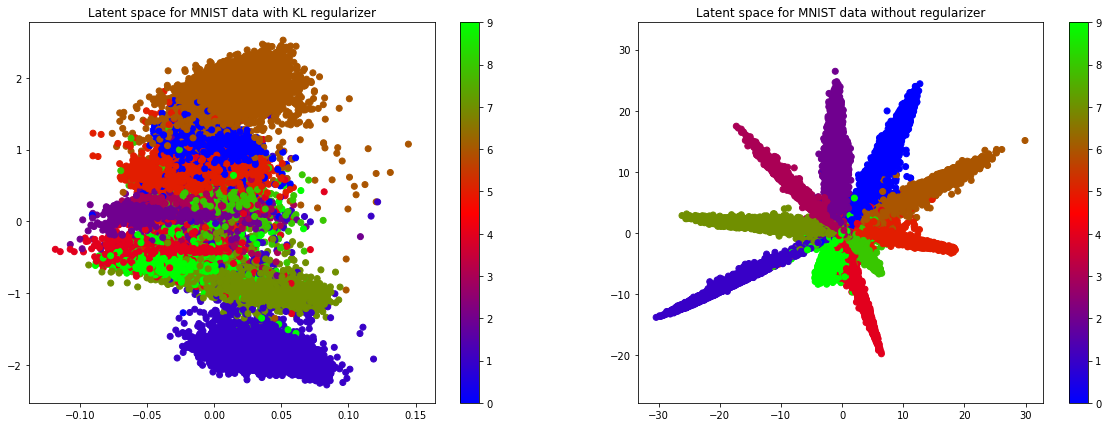

In [255]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.scatter(m2[:,0], m2[:,1], c=y_decoded, cmap='brg')
plt.title('Latent space for MNIST data with KL regularizer')
plt.colorbar()
# plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(m1[:,0], m1[:,1], c=y_decoded, cmap='brg')
plt.title('Latent space for MNIST data without regularizer')
plt.colorbar()
plt.axis('equal')



plt.show()